In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Seniment analysis on the clusters found with k-means

In [2]:
data = pd.read_csv("kmeans_clusters.csv",
                  encoding ='ISO-8859-1')

In [3]:
data.head(10)

,Unnamed: 0,Unnamed: 0.1,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_kmeans
0,0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,fool funny watch clue totally,4
1,1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",hall fame legend,0
2,2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,move delay v putin always knew smart,0
3,3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule,0
4,4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,say hope,9
5,5,5,2016-12-28 14:25:11,117710,814114980983427072,False,34542,Twitter for Android,not anymore. The beginning of the end was the ...,beginning end horrible deal un stay strong fast,0
6,6,6,2016-12-28 14:19:46,106626,814113616110751744,False,30237,Twitter for Android,We cannot continue to let Israel be treated wi...,cannot continue let total disrespect used friend,2
7,7,7,2016-12-28 14:07:13,117900,814110460761018368,False,31799,Twitter for Android,Doing my best to disregard the many inflammato...,best many statement thought going transition,0
8,8,8,2016-12-28 03:10:07,78521,813945096269860864,False,19159,Twitter for Android,The U.S. Consumer Confidence Index for Decembe...,consumer confidence nearly four point highest ...,0
9,9,9,2016-12-27 21:52:29,99838,813865160163098624,False,23222,Twitter for Android,President Obama campaigned hard (and personall...,hard personally important swing state lost voter,0


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [5]:
vader.polarity_scores('cannot continue let total disrespect used friend')

{'compound': 0.1027, 'neg': 0.255, 'neu': 0.455, 'pos': 0.291}

In [6]:
vader.polarity_scores('We cannot continue to let Israel be treated with such total disdain and disrespect. They used to have a great friend in the U.S., but.......')

{'compound': 0.34, 'neg': 0.178, 'neu': 0.602, 'pos': 0.22}

In [7]:
data.iloc[6]

Unnamed: 0                                                        6
Unnamed: 0.1                                                      6
created_at                                      2016-12-28 14:19:46
favorite_count                                               106626
id_str                                           814113616110751744
is_retweet                                                    False
retweet_count                                                 30237
source                                          Twitter for Android
text              We cannot continue to let Israel be treated wi...
text_pp            cannot continue let total disrespect used friend
label_kmeans                                                      2
Name: 6, dtype: object

In [8]:
data.loc[6]["text"]

'We cannot continue to let Israel be treated with such total disdain and disrespect. They used to have a great friend in the U.S., but.......'

In [9]:
data.loc[6]["text_pp"]

'cannot continue let total disrespect used friend'

In [10]:
text = data["text"]

In [11]:
text

0       Russians are playing @CNN and @NBCNews for suc...
1       Join @AmerIcan32, founded by Hall of Fame lege...
2       Great move on delay (by V. Putin) - I always k...
3       My Administration will follow two simple rules...
4       'Economists say Trump delivered hope' https://...
5       not anymore. The beginning of the end was the ...
6       We cannot continue to let Israel be treated wi...
7       Doing my best to disregard the many inflammato...
8       The U.S. Consumer Confidence Index for Decembe...
9       President Obama campaigned hard (and personall...
10      The DJT Foundation, unlike most foundations, n...
11      I gave millions of dollars to DJT Foundation, ...
12      The world was gloomy before I won - there was ...
13      The United Nations has such great potential bu...
14      President Obama said that he thinks he would h...
15      Merry Christmas and a very, very, very , very ...
16                #MerryChristmas https://t.co/5GgDmJrGMS
17      .@FoxN

In [12]:
scores = list()
for i in text:
    scores.append(vader.polarity_scores(i)['compound'])

In [13]:
len(scores)

4001

In [14]:
data['VADER_score'] = scores

In [15]:
data.head()

,Unnamed: 0,Unnamed: 0.1,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_kmeans,VADER_score
0,0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,fool funny watch clue totally,4,0.2695
1,1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",hall fame legend,0,0.6249
2,2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,move delay v putin always knew smart,0,0.7257
3,3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule,0,0.0000
4,4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,say hope,9,0.4404


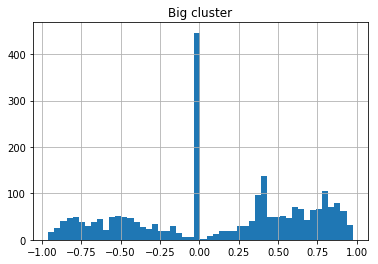

In [27]:
#cluster 0 big cluster
cluster0 = data.loc[data['label_kmeans'] == 0]
cluster0.count()
cluster0.hist('VADER_score', bins = 50)
plt.savefig('VADER_bigcluster.png',bbox_inches="tight")
plt.title('Big cluster')
plt.show()

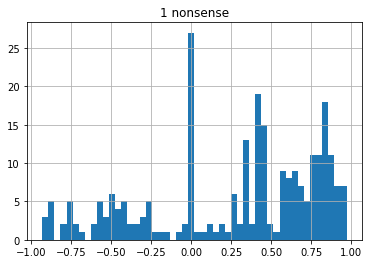

In [25]:
#cluster 1 nonsense
cluster1 = data.loc[data['label_kmeans'] == 1]
cluster1.count()
cluster1.hist('VADER_score', bins = 50)
plt.savefig('VADER_1nonsense.png',bbox_inches="tight")
plt.title('1 nonsense')
plt.show()

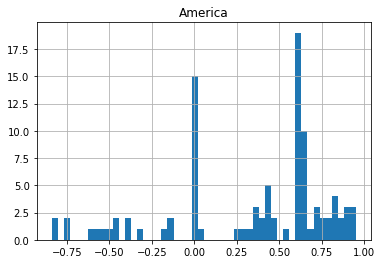

In [28]:
#cluster 2 america
cluster2 = data.loc[data['label_kmeans'] == 2]
cluster2.count()
cluster2.hist('VADER_score', bins = 50)
plt.savefig('VADER_america.png',bbox_inches="tight")
plt.title('America')
plt.show()

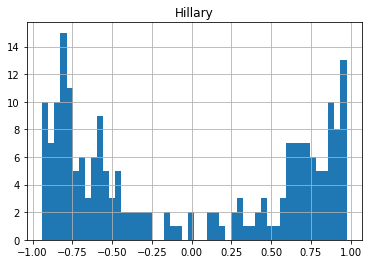

In [29]:
#cluster 3 hillary
cluster3 = data.loc[data['label_kmeans'] == 3]
cluster3.count()
cluster3.hist('VADER_score', bins = 50)
plt.savefig('VADER_hillary.png',bbox_inches="tight")
plt.title('Hillary')
plt.show()

In [49]:
cluster3.head()

,Unnamed: 0,Unnamed: 0.1,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_kmeans,VADER_score
19,19,19,2016-12-24 21:33:27,83507,812773204561379328,False,19826,Twitter for Android,The big loss yesterday for Israel in the Unite...,loss yesterday united nation much harder negot...,3,-0.3164
33,33,33,2016-12-21 13:29:38,82587,811564284706689024,False,20374,Twitter for Android,I have not heard any of the pundits or comment...,pundit commentator fact spent far money win loss,3,0.4199
35,35,35,2016-12-21 13:15:14,68734,811560662853939200,False,16033,Twitter for Android,Campaigning to win the Electoral College is mu...,win electoral college much difficult popular w...,3,0.8158
67,67,67,2016-12-13 11:57:35,77773,808642018612310016,False,18233,Twitter for Android,Wisconsin and Pennsylvania have just certified...,certified win state actually picked additional,3,0.6114
78,78,78,2016-12-12 01:02:14,72028,808114703922843648,False,19928,Twitter for Android,"Just watched @NBCNightlyNews - So biased, inac...",watched inaccurate bad point point much worse ...,3,-0.5619


In [50]:
cluster3_pos = cluster3.loc[cluster3['VADER_score'] >0.7]

In [51]:
cluster3_pos.head(50)

,Unnamed: 0,Unnamed: 0.1,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_kmeans,VADER_score
35,35,35,2016-12-21 13:15:14,68734,811560662853939200,False,16033,Twitter for Android,Campaigning to win the Electoral College is mu...,win electoral college much difficult popular w...,3,0.8158
152,152,152,2016-11-29 11:15:49,97975,803558077144399872,False,21661,Twitter for Android,The Great State of Michigan was just certified...,state michigan certified win giving supporter ...,3,0.9641
171,171,171,2016-11-27 03:59:52,100608,802723588759375872,False,31558,Twitter for Android,"The Democrats, when they incorrectly thought t...",democrat incorrectly thought going win electio...,3,0.7345
210,210,210,2016-11-13 18:46:36,113207,797873313561198592,False,23410,Twitter for iPhone,"The debates, especially the second and third, ...",especially second third plus speech large rall...,3,0.9268
213,213,213,2016-11-13 15:28:52,124725,797823553244712960,False,22618,Twitter for Android,"Governor John Kasich of the GREAT, GREAT, GREA...",governor state congratulate win incredible,3,0.9744
214,214,214,2016-11-13 15:23:28,107489,797822192931262464,False,18082,Twitter for Android,"Jeb Bush, George W and George H.W. all called ...",bush w express best wish win nice,3,0.9183
215,215,215,2016-11-13 14:45:28,110764,797812630312382464,False,15452,Twitter for Android,Mitt Romney called to congratulate me on the w...,mitt congratulate win nice,3,0.8856
218,218,218,2016-11-12 15:05:33,201692,797455295928791040,False,53578,Twitter for Android,This will prove to be a great time in the live...,prove life unite win win win,3,0.9501
237,238,238,2016-11-08 06:42:36,54396,795879172795203584,False,17323,Twitter for iPhone,Today we are going to win the great state of M...,going win state michigan going win back white ...,3,0.9478
289,293,293,2016-11-03 20:52:52,33150,794281211963338752,False,12262,Twitter for iPhone,"Thank you Concord, North Carolina! When WE win...",north win going going,3,0.7644


In [52]:
data.loc[2076]["text"]

"Wow, USA Today did todays cover story on my record in lawsuits. Verdict: 450 wins, 38 losses. Isn't that what you want for your president?"

In [55]:
cluster3_neg = cluster3.loc[cluster3['VADER_score'] <-0.7]

In [60]:
cluster3_neg.head(10)

,Unnamed: 0,Unnamed: 0.1,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_kmeans,VADER_score
155,155,155,2016-11-29 02:19:53,32567,803423203620245504,False,7723,Twitter for Android,"""@FiIibuster: @jeffzeleny Pathetic - you have ...",pathetic evidence suffer voter fraud shame bad...,3,-0.9293
216,216,216,2016-11-13 14:43:09,86992,797812048805695488,False,22131,Twitter for Android,The @nytimes sent a letter to their subscriber...,sent letter subscriber bad coverage wonder cha...,3,-0.7925
323,327,327,2016-11-01 10:31:46,55584,793400131525677056,False,21459,Twitter for Android,Look at the way Crooked Hillary is handling th...,look way handling e mail case total mess unfit...,3,-0.7424
422,426,426,2016-10-23 23:40:14,41150,790337063489040384,False,16269,Twitter for Android,The attack on Mosul is turning out to be a tot...,attack turning total disaster gave month notic...,3,-0.8020
499,503,503,2016-10-20 02:19:22,14918,788927558288969728,False,6272,Twitter Web Client,Bernie Sanders on HRC: Bad Judgement. John Pod...,sander bad podesta bad instinct league truth,3,-0.7906
671,677,677,2016-10-11 13:05:53,42510,785828772423561216,False,16799,Twitter for Android,"Our very weak and ineffective leader, Paul Rya...",weak ineffective leader bad conference call me...,3,-0.8155
677,683,683,2016-10-10 19:14:00,34322,785559022082658304,False,14451,Twitter for iPhone,CNN is the worst - fortunately they have bad r...,worst fortunately bad rating everyone know,3,-0.8658
750,756,756,2016-10-08 22:40:30,0,784886214931390464,True,37047,Twitter for iPhone,RT @atensnut: How many times must it be said? ...,many must said action speak word said bad thing,3,-0.9080
787,795,795,2016-10-05 02:17:30,0,783491271088156672,True,6022,Twitter for iPhone,RT @TeamTrump: Obama-Clinton FAILED foreign po...,foreign policy bad nuclear deal ransom payment...,3,-0.8455
858,866,866,2016-09-30 09:19:25,29597,781785509639118848,False,11510,Twitter for Android,Using Alicia M in the debate as a paragon of v...,virtue show bad set con,3,-0.7027


In [59]:
data.loc[2155]["text"]

"Crooked Hillary Clinton overregulates, overtaxes and doesn't care about jobs. Most importantly, she suffers from plain old bad judgement!"

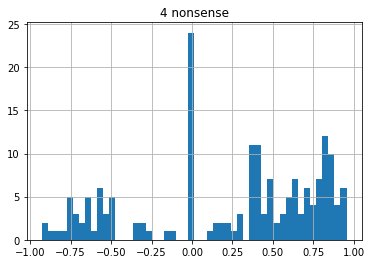

In [30]:
#cluster 4 nonsense
cluster4 = data.loc[data['label_kmeans'] == 4]
cluster4.count()
cluster4.hist('VADER_score', bins = 50)
plt.savefig('VADER_4nonsense.png',bbox_inches="tight")
plt.title('4 nonsense')
plt.show()

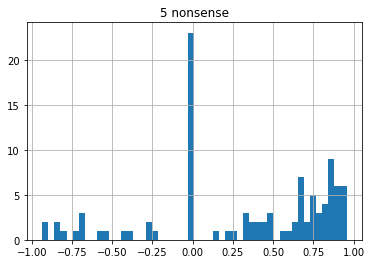

In [31]:
#cluster 5 nonsense
cluster5 = data.loc[data['label_kmeans'] == 5]
cluster5.count()
cluster5.hist('VADER_score', bins = 50)
plt.savefig('VADER_5nonsense.png',bbox_inches="tight")
plt.title('5 nonsense')
plt.show()

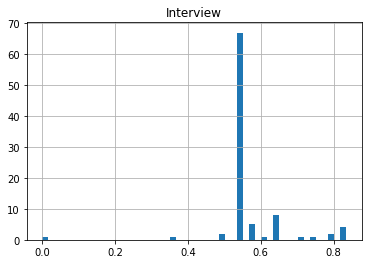

In [32]:
#cluster 6 interview
cluster6 = data.loc[data['label_kmeans'] == 6]
cluster6.count()
cluster6.hist('VADER_score', bins = 50)
plt.savefig('VADER_interview.png',bbox_inches="tight")
plt.title('Interview')
plt.show()

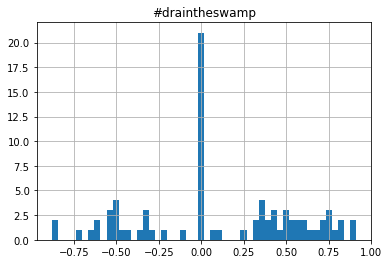

In [33]:
#cluster 7 #draintheswamp
cluster7 = data.loc[data['label_kmeans'] == 7]
cluster7.count()
cluster7.hist('VADER_score', bins = 50)
plt.savefig('VADER_draintheswamp.png',bbox_inches="tight")
plt.title('#draintheswamp')
plt.show()

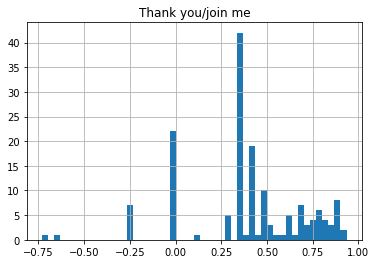

In [34]:
#cluster 8 thank you/join me
cluster8 = data.loc[data['label_kmeans'] == 8]
cluster8.count()
cluster8.hist('VADER_score', bins = 50)
plt.savefig('VADER_thank.png',bbox_inches="tight")
plt.title('Thank you/join me')
plt.show()

0 = big, 1 = nonsense, 2 = America, 
3 = Hillary?, 4 = nonsense, 5 = nonsense, 6 = interview, 
7 = #draintheswamp, 8 = thank you / join me, 9 = nonsense

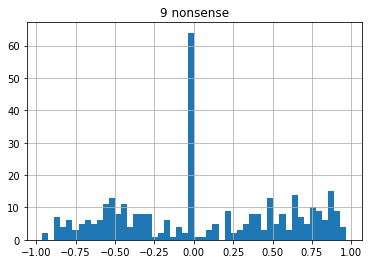

In [35]:
#cluster 9 nonsense
cluster9 = data.loc[data['label_kmeans'] == 9]
cluster9.count()
cluster9.hist('VADER_score', bins = 50)
#plt.savefig('VADER_train.png',bbox_inches="tight")
plt.title('9 nonsense')
plt.show()

### VADER on the whole dataset

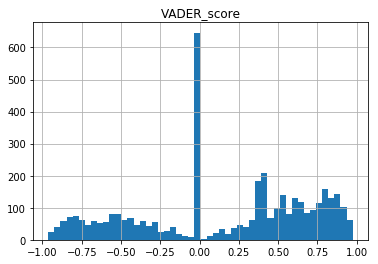

In [63]:
data.hist('VADER_score', bins = 50)
plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()